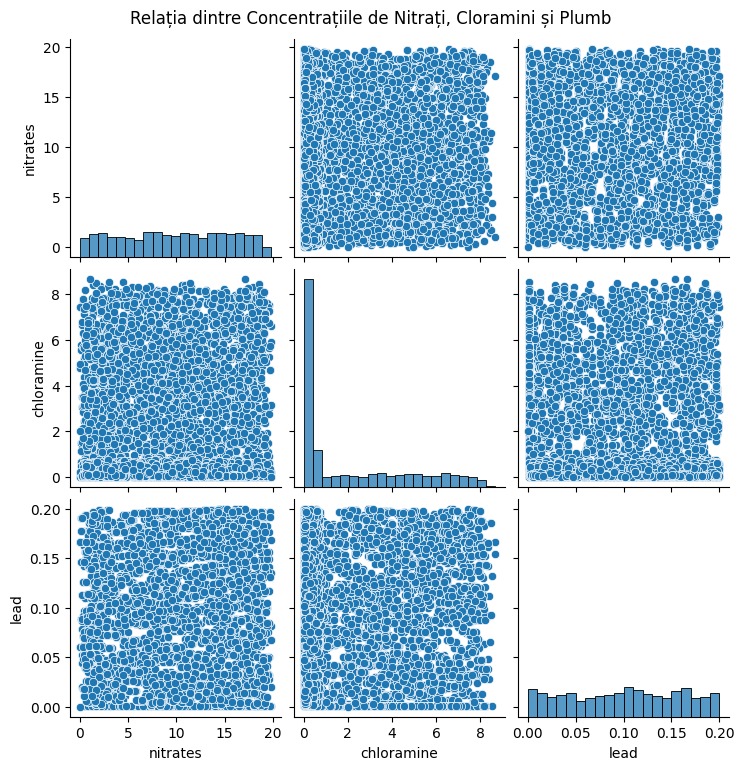

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the data from the uploaded file
file_path = 'waterQuality1.csv'
water_data = pd.read_csv(file_path)

# Selecting different columns for the plot - nitrates, chloramine, and lead
selected_columns = ['nitrates', 'chloramine', 'lead']

# Creating a pair plot to visualize the relationship between nitrates, chloramine, and lead
sns.pairplot(water_data[selected_columns])
plt.suptitle('Relația dintre Concentrațiile de Nitrați, Cloramini și Plumb', y=1.02)
plt.show()


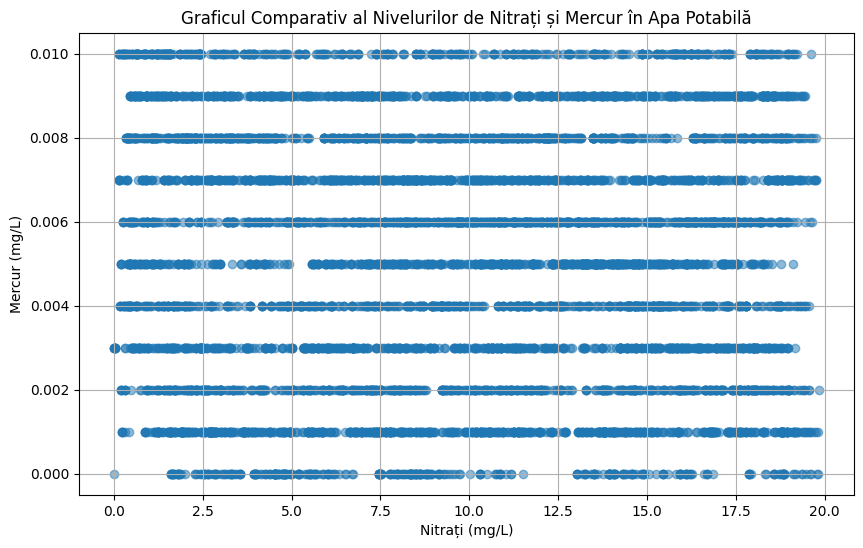

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset
file_path = 'waterQuality1.csv'
water_quality_data = pd.read_csv(file_path)

# Selecting only relevant columns (nitrates and mercury) and dropping rows with missing values
data_to_plot = water_quality_data[['nitrates', 'mercury']].dropna()

# Creating the comparative plot
plt.figure(figsize=(10, 6))
plt.scatter(data_to_plot['nitrates'], data_to_plot['mercury'], alpha=0.5)
plt.title('Graficul Comparativ al Nivelurilor de Nitrați și Mercur în Apa Potabilă')
plt.xlabel('Nitrați (mg/L)')
plt.ylabel('Mercur (mg/L)')
plt.grid(True)
plt.show()



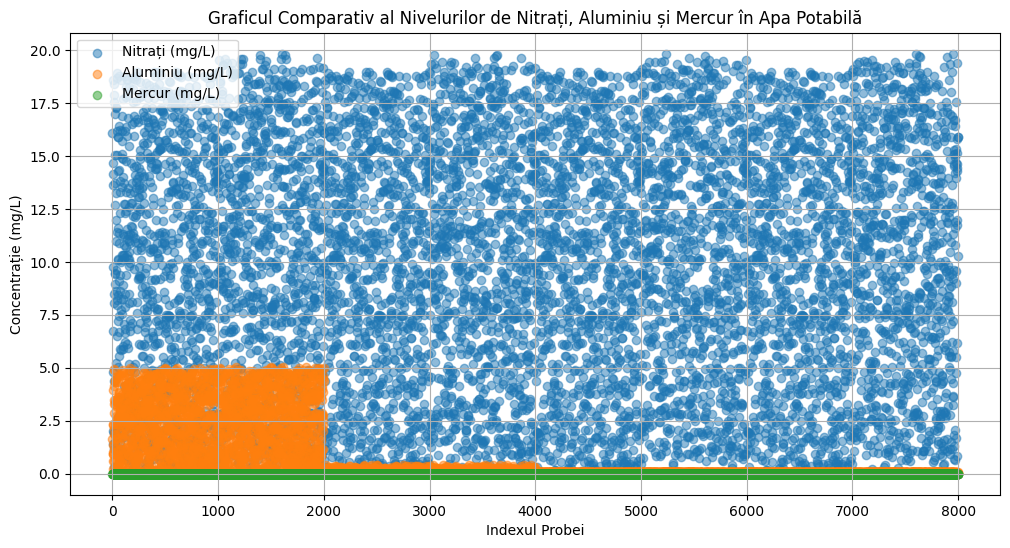

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Înlocuiți cu calea corectă a fișierului dvs. de date
file_path = 'waterQuality1.csv'

# Citirea datelor
water_quality_data = pd.read_csv(file_path)

# Selectarea coloanelor relevante (nitrați, aluminiu și mercur) și eliminarea rândurilor cu valori lipsă
data_to_plot = water_quality_data[['nitrates', 'aluminium', 'mercury']].dropna()

# Crearea graficului comparativ
plt.figure(figsize=(12, 6))

# Plotting each parameter
plt.scatter(data_to_plot.index, data_to_plot['nitrates'], alpha=0.5, label='Nitrați (mg/L)')
plt.scatter(data_to_plot.index, data_to_plot['aluminium'], alpha=0.5, label='Aluminiu (mg/L)')
plt.scatter(data_to_plot.index, data_to_plot['mercury'], alpha=0.5, label='Mercur (mg/L)')

plt.title('Graficul Comparativ al Nivelurilor de Nitrați, Aluminiu și Mercur în Apa Potabilă')
plt.xlabel('Indexul Probei')
plt.ylabel('Concentrație (mg/L)')
plt.legend()
plt.grid(True)
plt.show()


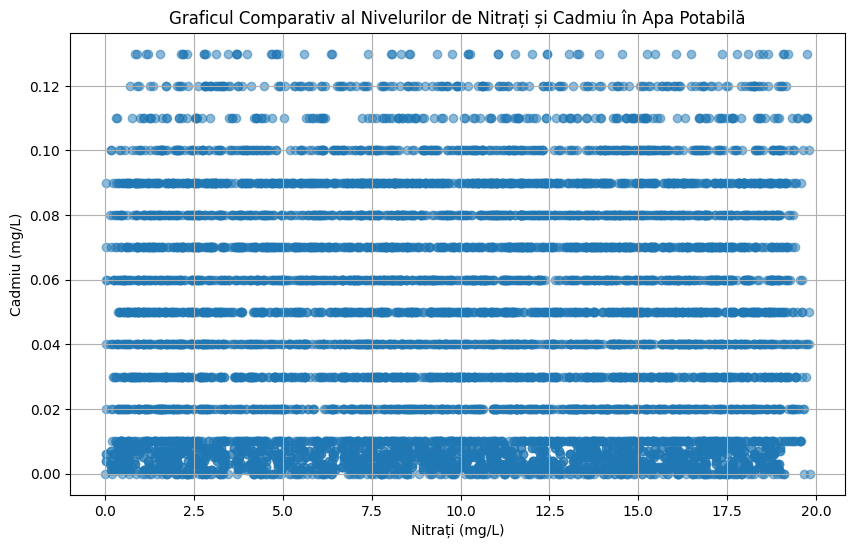

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Înlocuiți cu calea corectă a fișierului dvs. de date
file_path = 'waterQuality1.csv'

# Citirea datelor
water_quality_data = pd.read_csv(file_path)

# Selectarea coloanelor relevante (nitrați și cadmiu) și eliminarea rândurilor cu valori lipsă
data_to_plot = water_quality_data[['nitrates', 'cadmium']].dropna()

# Crearea graficului comparativ
plt.figure(figsize=(10, 6))
plt.scatter(data_to_plot['nitrates'], data_to_plot['cadmium'], alpha=0.5)
plt.title('Graficul Comparativ al Nivelurilor de Nitrați și Cadmiu în Apa Potabilă')
plt.xlabel('Nitrați (mg/L)')
plt.ylabel('Cadmiu (mg/L)')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<Figure size 1400x700 with 0 Axes>

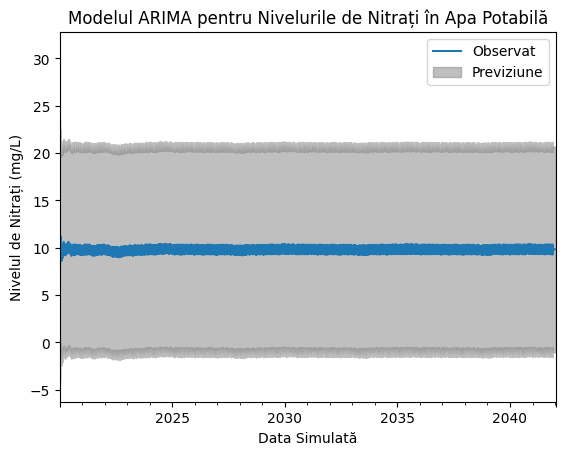

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

# Loading the dataset
file_path = 'waterQuality1.csv'
water_quality_data = pd.read_csv(file_path)

# For ARIMA, we need a time series, assuming 'Date' column exists and nitrate readings are ordered by date
# If 'Date' column does not exist, we would need to create a time series index based on the data we have
# In this case, we will assume the data is in a time series order

# As we don't have actual date information, we will simulate a date range for our time series index
water_quality_data['SimulatedDate'] = pd.date_range(start='1/1/2020', periods=len(water_quality_data), freq='D')
water_quality_data.set_index('SimulatedDate', inplace=True)

# Assuming 'nitrates' column holds the nitrate readings
nitrates_series = water_quality_data['nitrates'].dropna()

# Fit the ARIMA model (assuming 1,1,1 parameters for demonstration purposes)
# The order (p,d,q) needs to be determined using model diagnostics and parameter selection techniques
arima_model = ARIMA(nitrates_series, order=(1, 1, 1))
arima_results = arima_model.fit()

# Plot the original series and the forecasted values
plt.figure(figsize=(14,7))
plot_predict(arima_results, start=1, end=len(nitrates_series) + 50)
plt.title('Modelul ARIMA pentru Nivelurile de Nitrați în Apa Potabilă')
plt.xlabel('Data Simulată')
plt.ylabel('Nivelul de Nitrați (mg/L)')
plt.legend(['Observat', 'Previziune'])
plt.show()


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming the goal is to predict 'lead' based on 'nitrates' and 'chloramine'
# Defining the feature columns and the target column
feature_columns = ['nitrates', 'chloramine']
target_column = 'lead'

# Splitting the data into features (X) and target (y)
X = water_data[feature_columns]
y = water_data[target_column]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(0.003291748797692825, 0.00170420642372493)

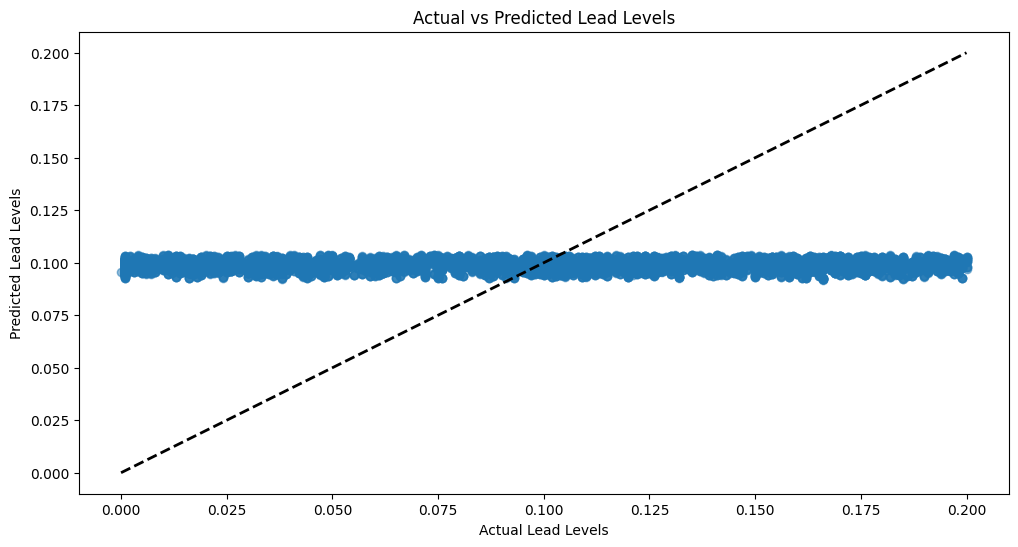

In [12]:
import matplotlib.pyplot as plt

# Predicting across the entire dataset for visualization
y_all_pred = model.predict(X)

# Plotting the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y, y_all_pred, alpha=0.5)
plt.title('Actual vs Predicted Lead Levels')
plt.xlabel('Actual Lead Levels')
plt.ylabel('Predicted Lead Levels')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line
plt.show()


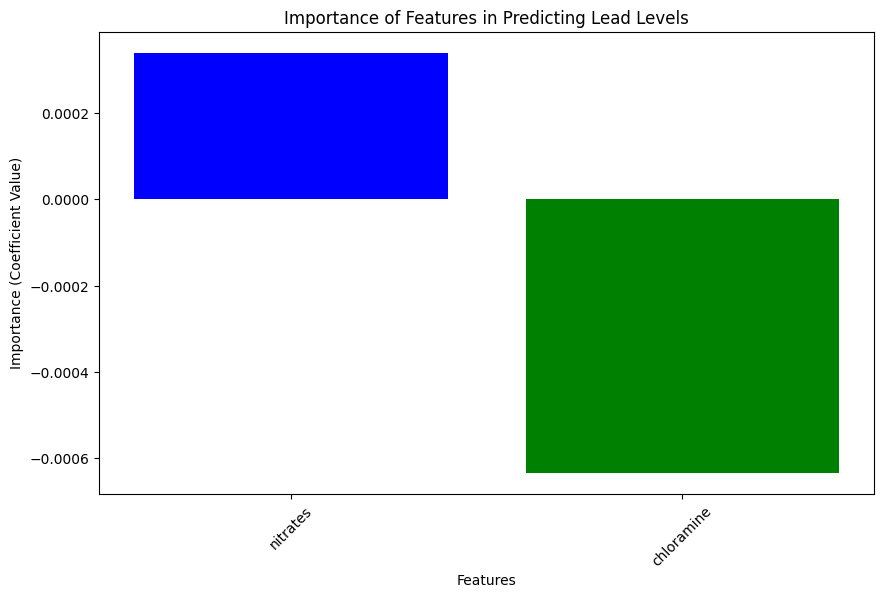

In [14]:
# Re-creating the DataFrame for feature importance since it seems it was not defined in the current session
feature_importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': model.coef_
})

# Creating a bar plot for feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color=['blue', 'green'])
plt.title('Importance of Features in Predicting Lead Levels')
plt.xlabel('Features')
plt.ylabel('Importance (Coefficient Value)')
plt.xticks(rotation=45)
plt.show()
